In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
X.shape, y.shape

((70000, 784), (70000,))

In [7]:
%matplotlib inline

In [8]:
from matplotlib import cm
import matplotlib.pyplot as plt

In [9]:
some_digit = X[2500]
some_digit_image = some_digit.reshape(28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

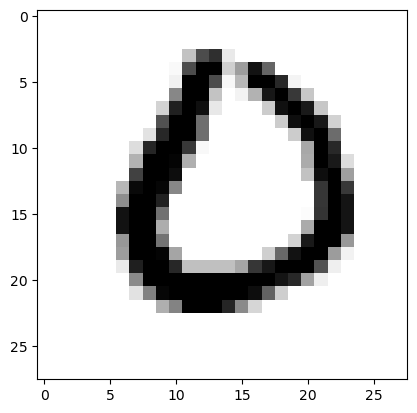

In [10]:
plt.imshow(some_digit_image, cmap=cm.binary)
plt.show

In [11]:
y[2500]

'0'

In [12]:
x_train, y_train, x_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [13]:
import numpy as np

In [14]:
shuffled = np.random.permutation(60000)

In [15]:
x_train, y_train = x_train[shuffled], y_train[shuffled]

### Detectar o número 7

In [16]:
y_train_7 = (y_train == '7')
y_test_7 = (y_test == '7') 

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(x_train, y_train_7)

SGDClassifier(random_state=42)

In [19]:
sdg_clf.predict([some_digit])[0]

False

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [21]:
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [22]:
for train_index, test_index in skfolds.split(x_train, y_train_7):
    clone_clf = clone(sdg_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = y_train_7[train_index]
    x_test_folds = x_train[test_index]
    y_test_folds = y_train_7[test_index]


    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

0.9737
0.97135
0.97565


In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sdg_clf, x_train, y_train_7, cv = 3, scoring='accuracy')

array([0.976 , 0.9696, 0.973 ])

In [24]:
from sklearn.base import BaseEstimator

In [25]:
class Never_7_Clf(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [26]:
Never_7 = Never_7_Clf()
cross_val_score(Never_7, x_train, y_train_7, cv=3, scoring='accuracy')

array([0.89555, 0.8958 , 0.8954 ])

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sdg_clf ,x_train, y_train_7, cv=3)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_7, y_train_pred)

array([[52495,  1240],
       [  388,  5877]], dtype=int64)

In [29]:
TP = 5261
FP = 368

precisão = TP / (TP+FP)
precisão

0.9346242671877776

In [30]:
FN = 1004

recall = TP / (TP + FN)
recall

0.8397446129289705

In [31]:
from sklearn.metrics import recall_score, precision_score, f1_score

precision_score(y_train_7, y_train_pred)

0.8257692848110159

In [32]:
recall_score(y_train_7, y_train_pred)

0.9380686352753392

In [33]:
f1_score(y_train_7, y_train_pred)

0.8783440442385294